# ENS Airdrop Claim Distribution

In [6]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import scipy

The ENS claim data in **ens_claims.csv** was obtained from FlipsideCrypto using the following query:

`select 
  event_inputs:value::number/1e18 as claimed_tokens
from ethereum.events_emitted
where contract_address = '0xc18360217d8f7ab5e7c516566761ea12ce7f9d72'
  and event_name = 'Claim'
  and event_removed = 'FALSE'
  and block_timestamp::date < '2022-05-05'`

In [4]:
df = pd.read_csv('ens_claims.csv')
df.head()

,CLAIMED_TOKENS
0,62.689540
1,195.594615
2,121.975641
3,195.594615
4,370.033477


In [7]:
print('Mode:',scipy.stats.mode(df))

Mode: ModeResult(mode=array([[97.797308]]), count=array([[1304]]))


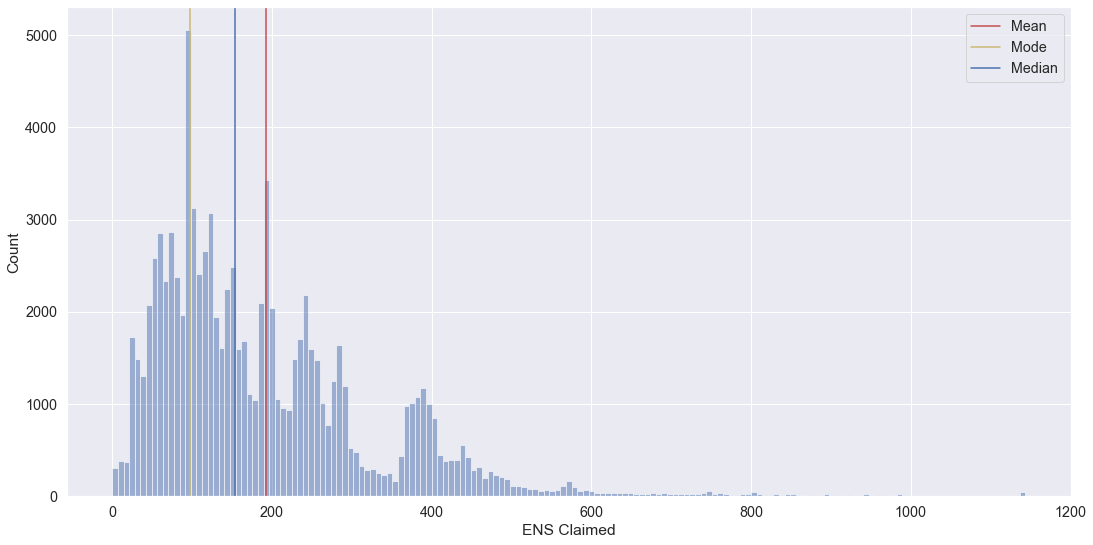

In [10]:
sns.set(font_scale=1.3)

plt.figure(figsize=(18,9))
ax = plt.subplot()
sns.histplot(data=df)
plt.axvline(np.mean(df.CLAIMED_TOKENS), color='r', label='Mean')
plt.axvline(scipy.stats.mode(df)[0], color = 'y', label ='Mode')
plt.axvline(np.median(df), label='Median')
ax.set_xlabel('ENS Claimed')
plt.legend()
plt.show()